<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C7/C7.html"><img src="../data/C7_nav.png" width="100"  style="float:right;" alt="C7"></a>
<h1>Version Identification</h1> 
</div>

<br/>

<p>
Closely following Section 7.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we consider in this notebook a retrieval task referred to as version identification. To tackle this task, we present an approach based on chroma representations and common subsequence matching (inspired by the approach originally introduced by Serrà et al.).
 
<ul>
<li><span style="color:black">
Joan Serrà, Emilia Gómez, Perfecto Herrera, and Xavier Serra: <strong><a href="https://ieeexplore.ieee.org/document/4523006">Chroma Binary Similarity and Local Alignment Applied to Cover Song Identification.</a></strong> IEEE Transactions on Audio, Speech, and Language Processing, 16: 1138&ndash;1151, 2008.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_SerraGHS08_CoverSong_IEEE-TASLP.txt"> Bibtex </a>
</span></li>
    
<li><span style="color:black">
Joan Serrà: <strong><a href="https://theses.eurasip.org/media/theses/documents/serra-joan-identification-of-versions-of-the-same-musical-composition-by-processing-audio-descriptions.pdf">Identification of Versions of the Same Musical Composition by Processing Audio Descriptions.</a></strong> PhD Thesis, Universitat Pompeu Fabra, Barcelona, Spain, 2011.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_Serra11_VersionIdentification_Thesis.txt"> Bibtex </a>
</span></li>
        
<li><span style="color:black">
Peter Grosche, Meinard Müller, and Joan Serrà: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_GroscheMuellerSerra_ContentBasedRetrieval_DagstuhlFU.pdf">Audio Content-Based Music Retrieval.</a></strong> In Meinard Müller and Masataka Goto and Markus Schedl (ed.): Multimodal Music Processing, Schloss Dagstuhl—Leibniz-Zentrum für Informatik, 3: 157–174, 2012.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_GroscheMS12_ContentBasedMusicRetrieval_DagstuhlFU.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 

## Version Identification System

In the [FMP notebook on content-based audio retrieval](../C7/C7_ContentBasedAudioRetrieval.html), we discussed various retrieval tasks based on the **query-by-example** paradigm. One of these tasks is **version identification**, which is also referred to as **cover song retrieval**. Given a music recording (or a part of it) of a musical piece, version identification aims at automatically retrieving all recorded versions (e.g., cover songs) of the same piece from a music collection.

* In version identification, the query typically consists of an entire recording&mdash;as opposed to [**audio identification**](../C7/C7S1_AudioIdentification.html) and [**audio matching**](../C7/C7S2_AudioMatching.html), where the query is only a small audio fragment. 
* Therefore, version identification is usually considered a **document-level** retrieval task, where a single similarity measure is used to globally compare entire documents. 
* The basic assumption in version identification is that the original and a derived version of a piece of music typically share some common characteristics. However, due to possible [structural differences](../C4/C4S1_MusicStructureGeneral.html) between these versions, it is not clear where these common elements occur. 
* When assessing the **global** similarity between a given query document and a database document, a general strategy in version identification is to look for **local** concurrences with regard to certain musical properties. In other words, the global comparison is performed on a local basis.

In view of the many possible [kinds of modifications](../C7/C7_ContentBasedAudioRetrieval.html) that may be applied when creating new versions, it is not realistic to assume that one can deal with all the resulting variations by using a single technique. In the following, we restrict ourselves to the scenario where the versions to be identified share a similar **melodic** or **harmonic 
progression**&mdash;at least in certain sections. On the other side, we allow differences in aspects such as tempo, instrumentation, timbre, and the overall musical structure. Following the work by Serrà et al., we now present the main ideas of a typical version identification procedure, which is tailored towards capturing **tonal elements** of music recordings while showing a high degree of invariance with regard to a wide range of modifications. Given two audio recordings (also called documents) of arbitrary length, the steps are as follows.

* First, to capture the tonal characteristics, the recordings are converted into sequences of [**chroma-based audio features**](../C3/C3S1_SpecLogFreq-Chromagram.html). 
* Second, a [**score matrix** (or **similarity matrix**)](../C4/C4S2_SSM.html) is computed by comparing the elements of these two sequences in a pairwise fashion.
* Third, ones tries to identify a potentially long **path of high similarity**. The presence of such a path indicates that the two chroma sequences share some related subsequences. 
* Finally, from this information, one derives a **similarity score** between the two versions to be compared.

This procedure is summarized by the following figure.

<img src="../data/C7/FMP_C7_F18.png" width="400px" align="middle" alt="FMP_C7_F18.png">

## Beatles Example

As our running example throughout this notebook, we use the song "Day Tripper" by the Beatles, which is based on an electric guitar riff. As a cover song version, we consider a live version played by the band Ocean Colour Scene. In the cover's live recording, the actual song starts at second $50$. Compared to the original version,  the tempo of the cover is faster, and it is performed in a "wilder" style ending with an extensive improvised outro.

<!--
Enhanced similarity matrix comparing the original version of the song "Day Tripper" by The Beatles (vertical axis) with a cover version by the band Ocean Colour Scene (horizontal axis).

<img src="../data/C7/FMP_C7_F19a.png" width="400px" align="middle" alt="FMP_C7_F19a.png">
-->


"Day Tripper" by The Beatles
<br clear="all" />
<audio src="../data/C7/FMP_C7_F19_TheBeatles_DayTripper_TheBeatles.mp3" type="audio/mpeg" controls="controls"></audio>

"Day Tripper" by Ocean Colour Scene
<br clear="all" />
<audio src="../data/C7/FMP_C7_F19_TheBeatles_DayTripper_OceanColourScene.mp3" type="audio/mpeg" controls="controls"></audio>


## Computation of Score Matrix

In the first step, both the query and the database document are converted into chroma-based feature sequences, say $X=(x_1,x_2,\ldots,x_N)$  and  $Y=(y_1,y_2,\ldots,y_M)$. Since we want to blend out nuances, the usage of a smoothed and normalized chroma variant such as the [CENS features](../C7/C7S2_CENS.html) is beneficial. In version identification, similar to the [audio matching](../C7/C7S2_AudioMatching.html) application, a feature rate of $2~\mathrm{Hz}$ (two chroma vectors per second) constitutes a good trade-off between robustness and specificity. 

Given the sequences $X$ and $Y$, we are now looking for a subsequence within $X$ and a subsequence within $Y$ such that these two subsequences are as similar as possible. To this end, we compute a **local alignment** using the technique as described in the [FMP notebook on common subsequence matching](../C7/C7S3_CommonSubsequence.html). To employ this score-maximizing alignment technique, one needs to input a score matrix that encodes potential relations between $X$ and $Y$ by cells with positive score and irrelevant information by cells with negative score. To construct such a score matrix we apply similar techniques as used in the [FMP notebook on audio thumbnailing](../C4/C4S3_AudioThumbnailing.html), where we constructed a [self-similarity matrix](../C4/C4S2_SSM.html).

* We obtain a first score matrix by comparing the elements of the sequences $X$ and $Y$ in a pairwise fashion. In our case, we use the inner product applied to normalized CENS vectors as local similarity measure.
* Paths of high similarity in this matrix indicate similar subsequences. To enhance this relevant information, we apply [path enhancement strategies](../C4/C4S2_SSM-PathEnhancement.html).
* To account for different musical keys, one may apply the same idea as was used in the [FMP notebook on transposition-invariant SSMs](../C4/C4S2_SSM-TranspositionInvariance.html).
* To obtain a balance between positive and and negative values, we apply a [thresholding procedure](../C4/C4S2_SSM-Thresholding.html) with normalization and penalty. In particular, we use a relative strategy (`strategy = relative`) for thresholding keeping $15$ percent of the cells with the highest values (`thresh=0.15`). Furthermore, we rescale the positive range between zero and one (`scale=1`). All other cells are considered irrelevant and are set to a negative score value (`penalty=-2`).

In the following code cell, we provide an implementation for computing such a score matrix, which is then shown for the song "Day Tripper." The vertical axis corresponds to the original Beatles version, whereas the horizontal axis corresponds to the cover version by Ocean Colour Scene.

<!--
<img src="../data/C7/FMP_C7_F19a.png" width="400px" align="middle" alt="FMP_C7_F19a.png">

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Song Name</th>
      <th style="border:none;text-align:left;">Original Version (The Beatles)</th>
      <th style="border:none;text-align:left;">Cover Version (Ocean Colour Scene)</th>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Day Tripper</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C7/FMP_C7_F19_TheBeatles_DayTripper_TheBeatles.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C7/FMP_C7_F19_TheBeatles_DayTripper_OceanColourScene.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
</table>
-->

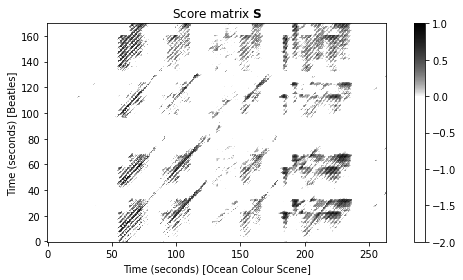

In [1]:
import os
import sys
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import display, Audio

sys.path.append('..')
import libfmp.b
import libfmp.c4
import libfmp.c7

%matplotlib inline

def compute_sm_from_wav(x1, x2, Fs, N=4410, H=2205, ell=21, d=5, L_smooth=12,
                        tempo_rel_set=np.array([0.66, 0.81, 1, 1.22, 1.5]),
                        shift_set=np.array([0]), strategy='relative', scale=True,
                        thresh=0.15, penalty=-2.0, binarize=False):
    """Compute a similarity matrix (SM)

    Notebook: C7/C7S3_VersionIdentification.ipynb

    Args:
        x1 (np.ndarray): First signal
        x2 (np.ndarray): Second signal
        Fs (scalar): Sampling rate of WAV files
        N (int): Window size for computing STFT-based chroma features (Default value = 4410)
        H (int): Hop size for computing STFT-based chroma features (Default value = 2205)
        ell (int): Smoothing length for computing CENS features (Default value = 21)
        d (int): Downsampling factor for computing CENS features (Default value = 5)
        L_smooth (int): Length of filter for enhancing SM (Default value = 12)
        tempo_rel_set (np.ndarray): Set of relative tempo values for enhancing SM
            (Default value = np.array([0.66, 0.81, 1, 1.22, 1.5]))
        shift_set (np.ndarray): Set of shift indices for enhancing SM (Default value = np.array([0]))
        strategy (str): Thresholding strategy for thresholding SM ('absolute', 'relative', 'local')
            (Default value = 'relative')
        scale (bool): If scale=True, then scaling of positive values to range [0,1] for thresholding SM
            (Default value = True)
        thresh (float): Treshold (meaning depends on strategy) (Default value = 0.15)
        penalty (float): Set values below treshold to value specified (Default value = -2.0)
        binarize (bool): Binarizes final matrix (positive: 1; otherwise: 0) (Default value = False)

    Returns:
        X (np.ndarray): CENS feature sequence for first signal
        Y (np.ndarray): CENS feature sequence for second signal
        Fs_feature (scalar): Feature rate
        S_thresh (np.ndarray): Similarity matrix
        I (np.ndarray): Index matrix
    """
    # Computation of CENS features
    C1 = librosa.feature.chroma_stft(y=x1, sr=Fs, tuning=0, norm=1, hop_length=H, n_fft=N)
    C2 = librosa.feature.chroma_stft(y=x2, sr=Fs, tuning=0, norm=1, hop_length=H, n_fft=N)
    Fs_C = Fs / H
    X, Fs_feature = libfmp.c7.compute_cens_from_chromagram(C1, Fs_C, ell=ell, d=d)
    Y, Fs_feature = libfmp.c7.compute_cens_from_chromagram(C2, Fs_C, ell=ell, d=d)

    # Compute enhanced SM
    S, I = libfmp.c4.compute_sm_ti(X, Y, L=L_smooth,  tempo_rel_set=tempo_rel_set,
                                   shift_set=shift_set, direction=2)
    S_thresh = libfmp.c4.threshold_matrix(S, thresh=thresh, strategy=strategy,
                                          scale=scale, penalty=penalty, binarize=binarize)
    return X, Y, Fs_feature, S_thresh, I

fn1 = os.path.join('..', 'data', 'C7', 'FMP_C7_F19_TheBeatles_DayTripper_TheBeatles.wav')
fn2 = os.path.join('..', 'data', 'C7', 'FMP_C7_F19_TheBeatles_DayTripper_OceanColourScene.wav')
Fs = 22050
x1, Fs = librosa.load(fn1, sr=Fs)
x2, Fs = librosa.load(fn2, sr=Fs)

penalty=-2
tempo_rel_set=np.array([0.8, 1, 1.2])
L_smooth = 20
X, Y, Fs_X, S, I = compute_sm_from_wav(x1, x2, Fs, tempo_rel_set = tempo_rel_set,
                                              L_smooth=L_smooth, penalty=penalty)

cmap_penalty = libfmp.c4.colormap_penalty(penalty=penalty)

figsize=(8, 4)
libfmp.b.plot_matrix(S, figsize=figsize, cmap=cmap_penalty, 
                     Fs=Fs_X, Fs_F=Fs_X, aspect='equal',
                     title='Score matrix $\mathbf{S}$', 
                     xlabel='Time (seconds) [Ocean Colour Scene]', 
                     ylabel='Time (seconds) [Beatles]')

plt.tight_layout()

## Common Subsequence Matching

In this score matrix, one can clearly notice a number of path components, which lie in the positive part of $\mathbf{S}$. On the other hand, there are no path-like structures at the beginning and the end of the cover version. As noted above, in the first fifty seconds, the band members interact and talk to the audience so that there are no tonal relations to the original Beatles version. In the following code cell, we use [common subsequence matching](../C7/C7S3_CommonSubsequence.html) for identifying a potentially long path of high similarity. The figure shows the score matrix $\mathrm{S}$ as well as the accumulated score matrix $\mathrm{D}$ with the optimal path, respectively.

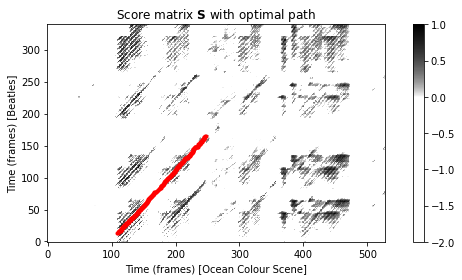

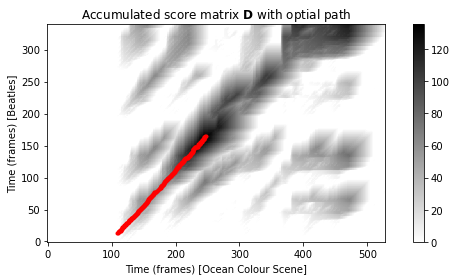

Maximal accumulated score Dmax = 135.52
Maximizing cell (n, m) = (165, 247)
Induced segment for X: [13:165]
Induced segment for Y: [109:247]


In [2]:
D = libfmp.c7.compute_accumulated_score_matrix_common_subsequence(S)
Dmax = np.max(D)
n, m = divmod(np.argmax(D), D.shape[1])
P = libfmp.c7.compute_optimal_path_common_subsequence(D)
seg_X, seg_Y = libfmp.c7.get_induced_segments(P)

figsize = (8, 4)
libfmp.b.plot_matrix(S, figsize=figsize, cmap=cmap_penalty, Fs=1, Fs_F=1, aspect='equal',
                     title='Score matrix $\mathbf{S}$ with optimal path', 
                     xlabel='Time (frames) [Ocean Colour Scene]', 
                     ylabel='Time (frames) [Beatles]')
plt.plot(P[:, 1], P[:, 0], marker='.', color='r')
plt.tight_layout()

figsize = (8, 4)
libfmp.b.plot_matrix(D, figsize=figsize, cmap='gray_r', Fs=1, Fs_F=1, aspect='equal',
                     title='Accumulated score matrix $\mathbf{D}$ with optial path', 
                     xlabel='Time (frames) [Ocean Colour Scene]', 
                     ylabel='Time (frames) [Beatles]')
plt.plot(P[:, 1], P[:, 0], marker='.', color='r')
plt.tight_layout()
plt.show()

print('Maximal accumulated score Dmax = %.2f' % Dmax)
print('Maximizing cell (n, m) = (%d, %d)' % (n, m))
print('Induced segment for X: [%d:%d]' % (seg_X[0], seg_X[-1]))
print('Induced segment for Y: [%d:%d]' % (seg_Y[0], seg_Y[-1]))

In the previous figure, the axes are given in frames. The longest contiguous path in $\mathbf{S}$ is running in diagonal direction, starting at cell $(13,109)$ and ending with cell $(165,247)$. The maximal entry in $\mathbf{D}$ is given by

$$
\mathbf{D}^\mathrm{max} = \mathbf{D}(165,247) = 135.52
$$

The matched common subsequences are $X[13:165]$ (for the Beatles version) and $Y[109:247]$ (for the cover version). Considering that the feature rate is $2~\mathrm{Hz}$, one can see that the section in the Beatles recording has a duration of roughly $76~\mathrm{sec}$, while the duration of the aligned section in the cover song is $69~\mathrm{sec}$. This again indicates that the tempo in the original version is slower than in the cover version by Ocean Colour Scene. In the following code cell, we again visualize the score matrix along with the optimal path&mdash;this time with axes given in seconds. The induced segments are indicated by the green lines. Furthermore, we present the two matching sections in the two recordings for playback. 

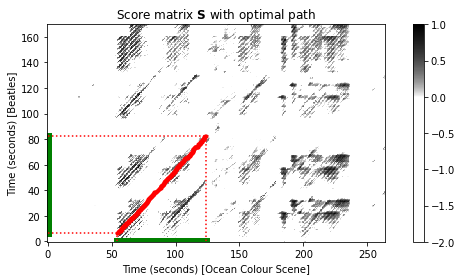

Induced segment of the original version (Beatles):


Induced segment of the cover version (Ocean Colour Scene):


In [3]:
figsize = (8, 4)
libfmp.b.plot_matrix(S, figsize=figsize, cmap=cmap_penalty, Fs=Fs_X, Fs_F=Fs_X, aspect='equal',
                     title='Score matrix $\mathbf{S}$ with optimal path', 
                     xlabel='Time (seconds) [Ocean Colour Scene]', 
                     ylabel='Time (seconds) [Beatles]')
plt.plot(P[:, 1] / Fs_X, P[:, 0] / Fs_X, marker='.', color='r')

start_X, start_Y = P[0, :] / Fs_X
end_X, end_Y = P[-1, :] / Fs_X

plt.plot([0, 0], [start_X, end_X], c='g', linewidth=7)
plt.plot([start_Y, end_Y], [0, 0], c='g', linewidth=7)

plt.plot([0, start_Y], [start_X, start_X], c='r', linestyle=':')
plt.plot([0, end_Y], [end_X, end_X], c='r', linestyle=':')

plt.plot([start_Y, start_Y], [0, start_X], c='r', linestyle=':')
plt.plot([end_Y, end_Y], [0, end_X], c='r', linestyle=':')
plt.tight_layout()
plt.show()

print('Induced segment of the original version (Beatles):')
display(Audio(x1[int(start_X * Fs):int(end_X * Fs)], rate=Fs))
print('Induced segment of the cover version (Ocean Colour Scene):')
display(Audio(x2[int(start_Y * Fs):int(end_Y * Fs)], rate=Fs))

## Further Notes

In summary, given two audio recordings, we computed chroma-based feature sequences $X$ and $Y$ and derived an enhanced similarity matrix $\mathbf{S}$. 

* In the design of this matrix it was important that the cells expressing tonal concurrences lie in the positive part of $\mathbf{S}$, while the irrelevant cells lie in the negative part. 
* The relative threshold parameter and penalty parameter can be used to balance out the positive and negative parts. 
* We then computed the highest value $\mathbf{D}^\mathrm{max}$ of an accumulated score matrix $\mathbf{D}$, which amounts to the total score of the two best matching subsequences of $X$ and $Y$. 
* By construction, the value $\mathbf{D}^\mathrm{max}$ is high if and only if the recordings share some common tonal progression of a certain degree of similarity and duration. 
* The duration of possible **gaps** (cells of negative score within an alignment path) can be controlled by the penalty parameter. 
* The concept of an alignment path allows for temporal deviations between these progressions, while the chroma features used yield some robustness to differences in timbre and dynamics. 
* Furthermore, using a local alignment, the specific locations of the progression within the versions are not relevant, which accounts for possible structural differences of the two versions.

Because of these properties, one can define the **overall similarity score** $\gamma(\mathcal{Q},\mathcal{D})$ for the document-level comparison between a query document $\mathcal{Q}$ and a database document $\mathcal{D}$ by setting

\begin{equation}
          \gamma(\mathcal{Q},\mathcal{D}):=\mathbf{D}^\mathrm{max}.
\end{equation}

This definition implements the idea of performing the **global comparison** on the basis of **local concurrences**. For the version identification task, a given query document is compared with all database documents. The database documents are then ranked according to the computed similarity score. In the [FMP notebook on evaluation](../C7/C7S3_Evaluation.html), we will discuss evaluation metrics that are useful for assessing the quality of such document-level retrieval approaches.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and Tim Zunner.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>